### Задачи к Лекции 3

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Роксана\Downloads\mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
# Делаем one-hot кодирование
chol = pd.get_dummies(df["cholesterol"], prefix="chol")
gluc = pd.get_dummies(df["gluc"], prefix="gluc")
df = pd.concat([df, chol, gluc], axis=1)

# Делаем пол бинарным признаком
df["gender_bin"] = df["gender"].map({1: 0, 2: 1})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3,gender_bin
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,True,False,False,True,False,False,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,False,False,True,True,False,False,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False,False,True,True,False,False,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True,False,False,True,False,False,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,True,False,False,True,False,False,0


## Классы в Python

Нередко, возникает необходимость создания объектов с каким-нибудь внутренним поведением и состоянием. Примерами таких объектов являются классификаторы sklearn, массивы numpy и много другое. Такой объект можно объявить с помощью ключевого слова **class**

```python
class SomeObject:
    def __init__(self, depth):
        self.a = depth
        self.target = None
        
    def fit(self, data, target):
        self.target = data
        # magic
        return 
    
    def predict(self, data):
        return self.target    
```

После этого в коде можно будет создать экземпляр данного класса
```python
a = SomeObject(depth=5)
a.fit(data, target)
a.predict(data)
```

## Задачи

**1. В sklearn на данный момент отсутствует функционал для построения деревьев решений из категориальных данных, поэтому его нужно сделать самостоятельно и проверить его работу. Что нужно сделать:**

* __создать классификатор используя только pandas, numpy и scipy. Необходимо его сделать самому, используя исключительно только numpy, pandas и scipy (запрещено использовать sklearn и прочие библиотеки). Напоминаю, что для категориальных данных операция < или > не имеют смысла (использовать только != и ==). Гиперпараметром данного классификатора должна быть максимальная глубина дерева.__
* __Проверить работу данного классификатора на наборе ("gender", "cholesterol", "gluc").__
* __С помощью кросс-валидации найти оптимальную глубину этого дерева. Для вашего классификатора GridSearchCV не подойдет, придется это сделать также самостоятельно.__
* __Нарисовать полученное дерево (я должен понять, как и откуда вы его нарисовали).__

Алгоритм работы классификатора:
 1. Перебираем все возможные признаки и смотрим либо неопределенность Джини, либо прирост информации. Это даст критерий разбиения в виде "признак == значение"
 2. Если выборка полученная при разбиении состоит из объектов одного класса (соответсвует нулевой энтропии), то данный лист просто возвращает значение этого класса.
 3. В противном случае, образуется новый узел и для него начинаем с пункта 1.
 4. Если достигли максимальной глубины, то вместа узла создаем лист, который возвращает самое вероятное значение.
 
__Замечание:__ в этой задаче не нужно использовать onehot-кодирование.

# Ререшение с sklearn (потому что на паре разрешили делать так)

# Создание классификатора

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import warnings
#ЗАГРУЖАЮ ДАТАСЕТ
df = pd.read_csv(r"C:\Users\Роксана\Downloads\mlbootcamp5_train.csv", sep=";", index_col="id")
df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [12]:
#ДЛЯ НАЧАЛА УБЕРУ АНОМАЛЬНЫЕ ЗНАЧЕНИЯ ИЗ ДАТАСЕТА

#задаю границы нормального артериального давления
normal_ap_hi = (50,250)
normal_ap_lo = (30,200)
#задаю границы нормального роста
normal_h = (120,250)
#задаю границы нормального веса
normal_w = (30,200)
#теперь отбрасываю значения, выбивающиеся из нормальных
clean_df = df[(df['ap_hi']>=normal_ap_hi[0])&(df['ap_hi']<=normal_ap_hi[1])& 
(df['ap_lo']>=normal_ap_lo[0])&(df['ap_lo']<=normal_ap_lo[1])&
(df['height']>=normal_h[0])&(df['height']<=normal_h[1])&
(df['weight']>=normal_w[0])&(df['weight']<=normal_w[1])]

In [40]:
#выбираю признаки
X = clean_df[['gender', 'cholesterol', 'gluc']]
target = clean_df['cardio']

#делю выборку на тренировочную и тестовую
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.3)

In [41]:
#создание модели
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3 #задаю глубину дерева
)

In [42]:
#обучение модели
tree.fit(X_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
#провожу оценку качества
accuracy = tree.score(X_test, target_test)
print(f"Точность на тесте: {accuracy:3f}")

Точность на тесте: 0.595548


# Нахождение оптимальной длины дерева с помощуью кросс-валидации

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
#параметры для перебора
params = {"max_depth": [1, 2, 3]} #глубина 3 для перебора

#создание и выполнение GridSearch
grid = GridSearchCV(
    DecisionTreeClassifier(criterion="entropy"),
    param_grid=params,
    cv=5,  #5-fold кросс-валидация
    scoring="accuracy" #метрика для оценки качества
)
grid.fit(X_train, target_train)

#нахожу лучшую глубину
best_depth = grid.best_params_["max_depth"]
print(f"Оптимальная глубина: {best_depth}")

Оптимальная глубина: 3


# Визуализация дерева

**1. С помощую sklearn.tree.plot_tree**

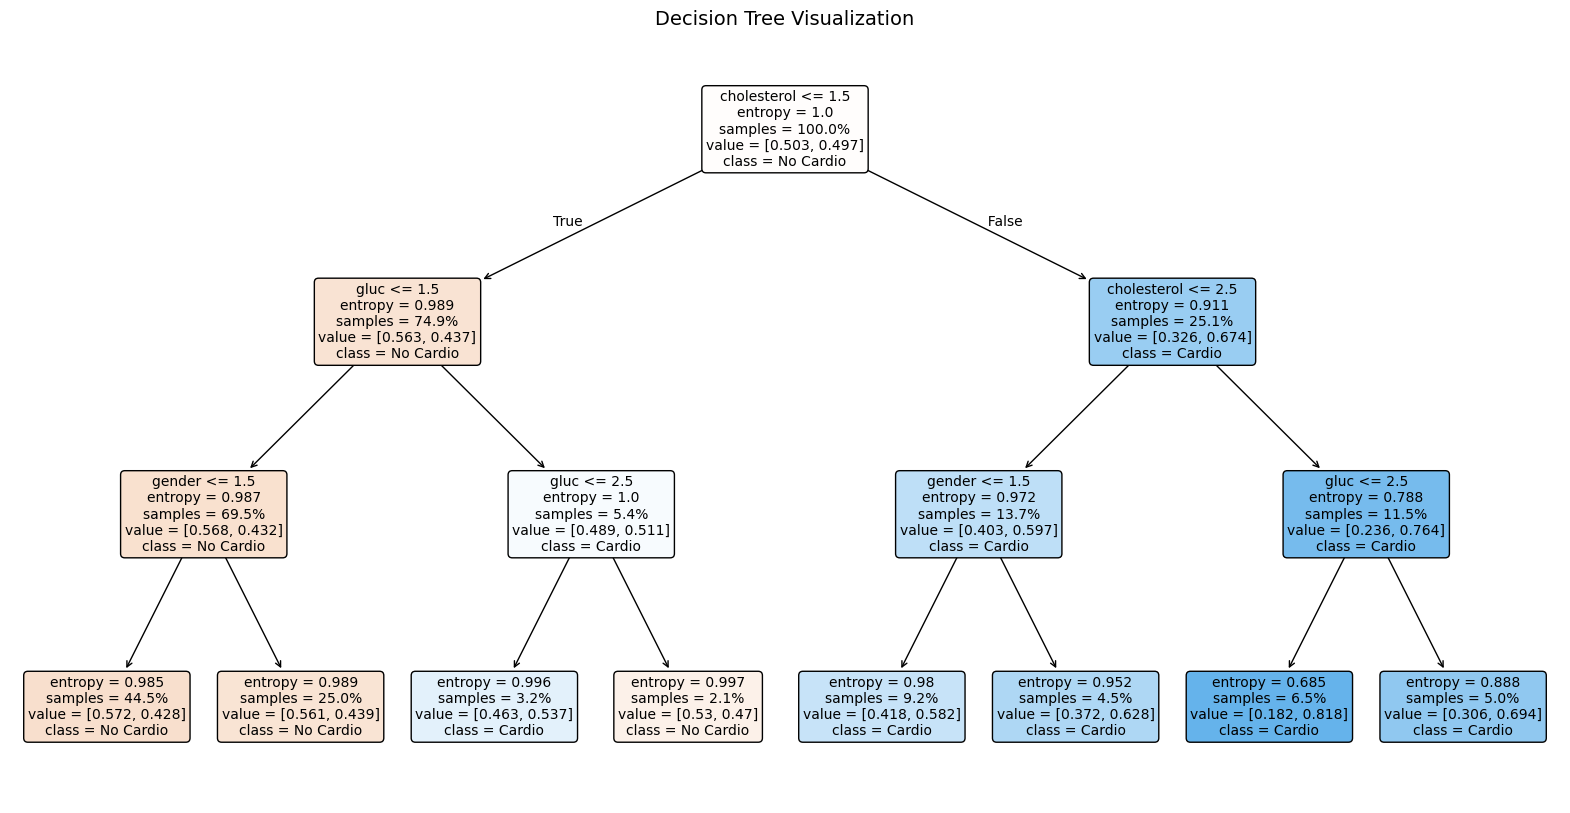

In [59]:
plt.figure(figsize=(20, 10))  #установливаю размер фигуры

plot_tree(tree,
          feature_names=X.columns.tolist(),  #задаю имена признаков
          class_names=['No Cardio', 'Cardio'],  #имена классов
          filled=True,          #включаю заливку цветом по классу
          rounded=True,        #делаю закругленные углы
          proportion=True,     #включаю показывать пропорции вместо количеств
          impurity=True,       #включаю показ impurity (энтропию/джини)
          fontsize=10)         #задаю размер шрифта

plt.title("Decision Tree Visualization", fontsize=14)
plt.show()

**2. Альтернативный вариант с помощью graphviz**

In [37]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [52]:
from sklearn.tree import export_graphviz
import graphviz

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [56]:
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Cardio', 'Cardio'],
    filled=True,
    rounded=True,
    special_characters=True
)

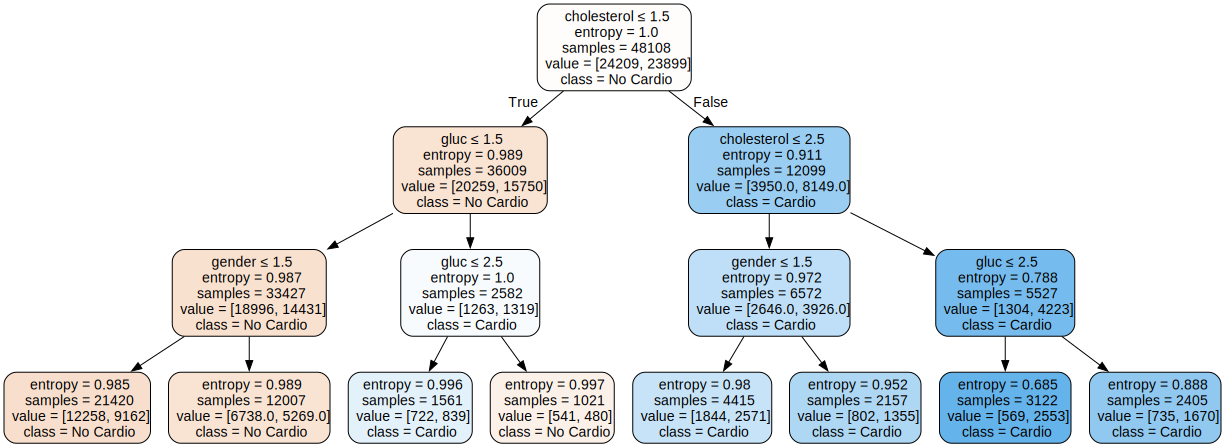

In [57]:
graph = graphviz.Source(dot_data)
graph

**Комментарии:** Ваши комментарии здесь.